# **Gender Recognition through voice using Support Vector Machine Algorithm**

<img src="https://github.com/sanketpadwal/GCDAI_INSAID_JAN20/blob/main/Term4/Voice_Recognition1.jpeg?raw=true" width="500" height="300"/> <img src="https://github.com/sanketpadwal/GCDAI_INSAID_JAN20/blob/main/Term4/Voice_Recognition.jpeg?raw=true" width="500" height="300"/>



## Table of Content

1. [Introduction](#Section1)<br>
2. [Problem Statement](#Section2)<br>
3. [Install Packages](#Section3)<br>
4. [Load Data](#Section4)<br>
5. [Data Screening](#Section5)<br>
6. [Data Preprocessing](#Section6)<br>
7. [Data Exploration](#Section7)<br>
8. [Scale Data](#Section8)<br>
9. [Split Data](#Section9)<br>
10. [Train Model and Predictions](#Section10)<br>
11. [Conclusion](#Section11)<br>
12. [Recommendation](#Section12)<br>

---
<a name = Section1></a>
### **1. Introduction**
---

**Voice recognition** is the process of taking the spoken word as an input to a computer program. This process is important to virtual reality because it provides a fairly natural and intuitive way of controlling the simulation while allowing the user's hands to remain free. Voice recognition enables consumers to multitask by speaking directly to their Google Home, Amazon Alexa or other voice recognition technology. By using machine learning and sophisticated algorithms, voice recognition technology can quickly turn your spoken work into written text. Voice recognition technology also identifies a speaker and authenticates that he or she is indeed that individual. Unlike speech recognition, which identifies the words spoken, voice recognition analyzes countless patterns and elements that distinguish one person's voice from another. These days we expect personalization and want to search the internet without wasting time. That’s the reason why Voice Search technology seems so promising.

---
<a name = Section2></a>
### **2. Problem Statement**
---
The provided audio data cannot be understood by the models directly. To convert data into an understandable format feature extraction process is used. It is a process that explains most of the data but in an understandable way. Feature extraction is required for classification, prediction and recommendation algorithms incase data input in in audio format.<br> **'WarbleR R package'** is designed for Acoustic analysis. The dataset which have acoustic parameters can be obtained with this analysis. Acoustic analysis of the voice depend upon parameter settings specific to sample characteristics such as intensity, duration, frequency and filtering. The acoustic properties of the voice and speech can be used to detect gender of the speaker. The dataset can be trained with different machine learning algorithms. In this project, SVM Classification method is used to detect(predict) the gender of voice inputs. Objective of this assessment is to identify the SVM kernel and hyper parameters for the better accuracy.



### **Dataset:**
#### **Voice Gender**
*Gender recognition by voice and speech analysis.*<br>
This database was created to identify a voice as male or female, based upon acoustic properties of the voice and speech. The dataset consists of 3168 recorded voice samples, collected from male and female speakers. The voice samples are pre-processed by acoustic analysis in R using the seewave and tuneR packages, with an analyzed frequency range of 0hz-280hz (human voice range)to derive 20 features.<br> 

**Source:** Github <br>https://raw.githubusercontent.com/sanketpadwal/GCDAI_INSAID_JAN20/main/Term4/voice.csv?_sm_au_=iVVHZq1W63S7vfBVL321jK0f1JH33

**Attribute Information:**<br>
1. **meanfreq:** mean frequency (in kHz)<br>
2. **sd:** standard deviation of frequency <br>
3. **median:** median frequency (in kHz)<br>
4. **Q25:** first quantile (in kHz)<br>
5. **Q75:** third quantile (in kHz)<br>
6. **IQR:** interquantile range (in kHz)<br>
7. **skew:** skewness (see note in specprop description)<br>
8. **kurt** kurtosis (see note in specprop description)<br>
9. **sp.ent:** spectral entropy<br>
10. **sfm:** spectral flatness<br>
11. **mode:** mode frequency<br>
12. **centroid:** frequency centroid (see specprop)<br>
13. **meanfun:** average of fundamental frequency measured across acoustic signal<br>
14. **minfun:** minimum fundamental frequency measured across acoustic signal<br>
15. **maxfun:** maximum fundamental frequency measured across acoustic signal<br>
16. **meandom:** average of dominant frequency measured across acoustic signal<br>
17. **mindom:** minimum of dominant frequency measured across acoustic signal<br>
18. **maxdom:** maximum of dominant frequency measured across acoustic signal<br>
19. **dfrange:** range of dominant frequency measured across acoustic signal<br>
20. **modindx:** modulation index. Calculated as the accumulated absolute difference between<br>adjacent measurements of fundamental frequencies divided by the frequency range<br>
21. **label:** male or female 

### **Objectives:**
 - Obtain an understanding on Support Vector Machine algorithm.
 - Fine tune algorithm to predict better accuracy with different kernel selections
 - Use of cross validation for the validation of results.
 - Perform Grid search technique to find the best parameter for SVM algorithm.
 - Compare accuracy with Decision Tree, Random Forest and Logistic Regressor models.

---
<a name = Section3></a>
### **3. Install Packages**
---

In [1]:
# # Install Packages
# !pip install -q category_encoders 
# !pip install -q pandas
# !pip install -q matplotlib

In [2]:
# Load Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

%matplotlib inline

---
<a name = Section4></a>
### **4. Load Data**
---

In [3]:
#Load Data
data = pd.read_csv('https://raw.githubusercontent.com/sanketpadwal/GCDAI_INSAID_JAN20/main/Term4/voice.csv?_sm_au_=iVVHZq1W63S7vfBVL321jK0f1JH33')
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [4]:
# Size of the data
data.shape

(3168, 21)

---
<a name = Section5></a>
### **5. Data Screening**
---

In [5]:
# Explore data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

**Observations**
- 'label' column is the target variable with data type as object.
- all feature columns are of data type - float.

In [6]:
# Different columns in the dataset
data.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [7]:
# Check for na or null values
data.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [8]:
# Describe dataset columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
meanfreq,3168.0,0.180907,0.029918,0.039363,0.163662,0.184838,0.199146,0.251124
sd,3168.0,0.057126,0.016652,0.018363,0.041954,0.059155,0.067020,0.115273
median,3168.0,0.185621,0.036360,0.010975,0.169593,0.190032,0.210618,0.261224
Q25,3168.0,0.140456,0.048680,0.000229,0.111087,0.140286,0.175939,0.247347
Q75,3168.0,0.224765,0.023639,0.042946,0.208747,0.225684,0.243660,0.273469
IQR,3168.0,0.084309,0.042783,0.014558,0.042560,0.094280,0.114175,0.252225
skew,3168.0,3.140168,4.240529,0.141735,1.649569,2.197101,2.931694,34.725453
kurt,3168.0,36.568461,134.928661,2.068455,5.669547,8.318463,13.648905,1309.612887
sp.ent,3168.0,0.895127,0.044980,0.738651,0.861811,0.901767,0.928713,0.981997
sfm,3168.0,0.408216,0.177521,0.036876,0.258041,0.396335,0.533676,0.842936


In [9]:
# Data Skewness check
data.skew()

meanfreq   -0.617495
sd          0.136916
median     -1.012785
Q25        -0.490877
Q75        -0.900311
IQR         0.295432
skew        4.933314
kurt        5.872586
sp.ent     -0.430934
sfm         0.339958
mode       -0.837236
centroid   -0.617495
meanfun     0.039141
minfun      1.878004
maxfun     -2.238535
meandom     0.611022
mindom      1.661114
maxdom      0.726189
dfrange     0.728261
modindx     2.064335
dtype: float64

**Observations**
- Skewness is higher for columns 'skew', 'kurt', 'minfun', 'mindom', 'modindx' whereas lower for column 'maxfun'. Keeping columns as per original datasets.

In [10]:
# Data Kurtosis check
data.kurtosis()

meanfreq     0.805161
sd          -0.521789
median       1.629501
Q25          0.018334
Q75          2.981810
IQR         -0.448160
skew        25.363446
kurt        35.932129
sp.ent      -0.423925
sfm         -0.835934
mode        -0.255908
centroid     0.805161
meanfun     -0.859960
minfun      10.758086
maxfun       5.203918
meandom     -0.054773
mindom       2.187586
maxdom       1.314738
dfrange      1.318013
modindx      5.924935
dtype: float64

**Observations**
- Kurtosis is higher for columns 'skew', 'kurt', 'minfun', 'maxfun', 'modindx'. Keeping columns as per original datasets.

---
<a name = Section6></a>
### **6. Data Preprocessing**
---
Use of **Pandas Profiling** to perform EDA.

In [11]:
# !pip install -q pandas-profiling==2.5.0

In [12]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(data, title="Pandas Profiling Report")
# profile.to_file("your_report.html")

**Observations**
- Dataset has 2 (0.1%) duplicate rows **(Duplicates)**: identical data points
- median is highly correlated with meanfreq and 1 other fields **(High Correlation)**
- meanfreq is highly correlated with median and 2 other fields **(High Correlation)**
- Q25 is highly correlated with meanfreq and 1 other fields	**(High Correlation)**
- kurt is highly correlated with skew **(High Correlation)**
- skew is highly correlated with kurt **(High Correlation)**
- centroid is highly correlated with meanfreq and 2 other fields **(High Correlation)**
- dfrange is highly correlated with maxdom **(High Correlation)**
- maxdom is highly correlated with dfrange **(High Correlation)**
- mode has 236 (7.4%) zeros **(Zeros)**
- dfrange has 65 (2.1%) zeros **(Zeros)**
- modindx has 65 (2.1%) zeros **(Zeros)**

---
<a name = Section7></a>
### **7. Data Exploration**
---

In [13]:
# Class break up
data.groupby('label').count()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
label,,,,,,,,,,,,,,,,,,,,
female,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584
male,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584


**Observations**
 - Target variable is balanced and is with 50%-50% class split up. 0 - female, 1 - male

In [14]:
data['label'] = data['label'].replace(to_replace =['female','male'], value = [0,1])

Class as pie chart:


Text(0, 0.5, '')

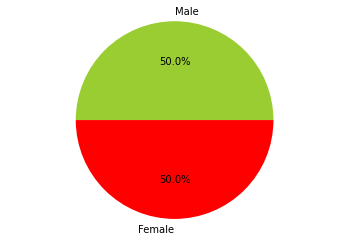

In [15]:
# % break up - Class
print("Class as pie chart:")
fig, ax = plt.subplots(1, 1)
ax.pie(data.label.value_counts(),autopct='%1.1f%%', labels=['Male','Female'], colors=['yellowgreen','r'])
plt.axis('equal')
plt.ylabel('')

Text(0.5, 1.0, 'Correlation between features')

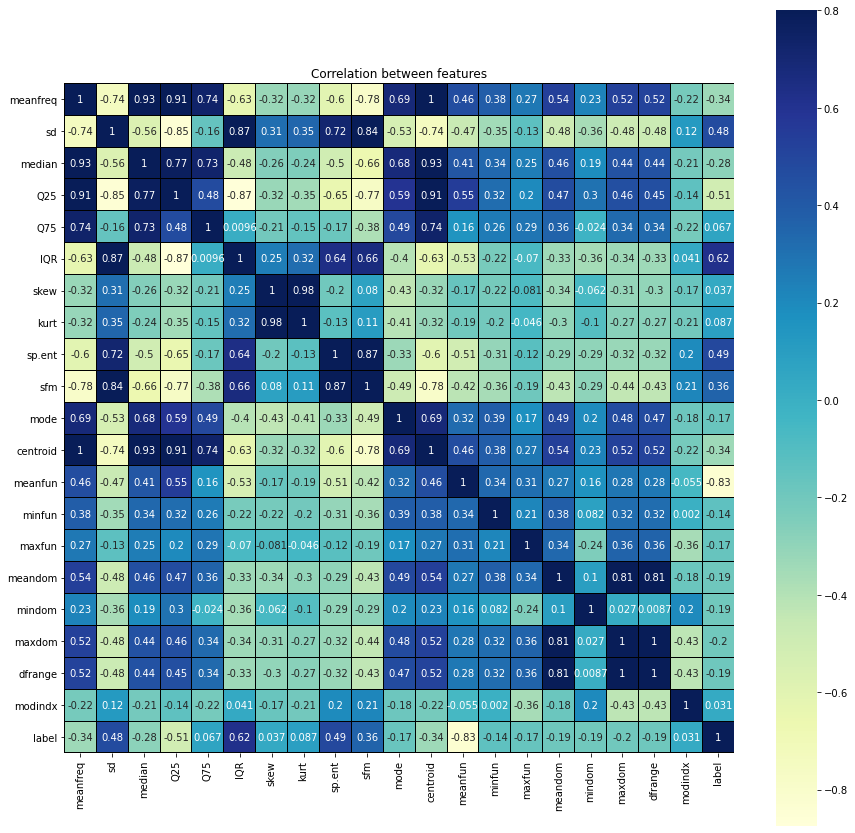

In [16]:
corr = data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,vmax=.8,linewidth=.01,square = True,annot = True, cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

**Observations**
- there are columns with correlations values higher than 0.8 and lower than -0.8 but keeping all columns as per orignial dataset. Not dropping any of these columns.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

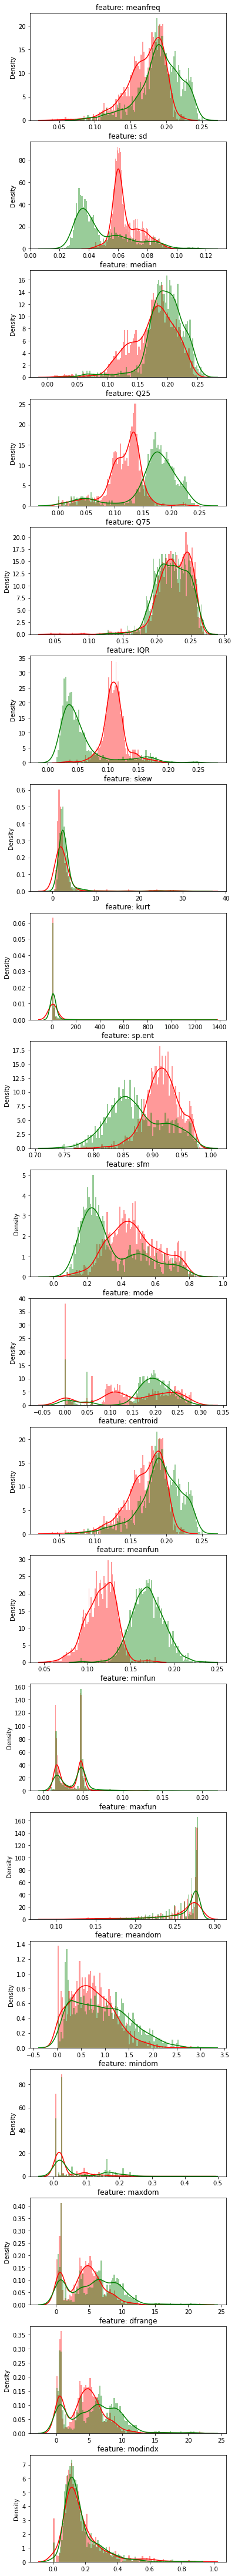

In [17]:
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(28, 1)
plt.figure(figsize=(6,28*4))
for i, col in enumerate(data[data.iloc[:,0:20].columns]):
    ax5 = plt.subplot(gs[i])
    sns.distplot(data[col][data.label == 1], bins=100, color='r')
    sns.distplot(data[col][data.label == 0], bins=100, color='g')

    ax5.set_xlabel('')
    ax5.set_title('feature: ' + str(col))
plt.show()

---
<a name = Section8></a>
### **8. Scale Data**
---

In [18]:
# Features and Target Split
X, y = data.iloc[:, :-1].values, data.iloc[:, -1].values

In [19]:
# Scale data using standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

---
<a name = Section9></a>
### **9. Split Data**
---

In [20]:
# split data unsing train_test_split
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42, stratify=y)

---
<a name = Section10></a>
### **10. Train Model and Predictions**
---

### Identify Kernel.
#### 10.1 Running SVM with default hyperparameter.

In [21]:
#@title
#Default hyperparameters

from sklearn.svm import SVC
from sklearn import metrics
svc=SVC()                    
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9831756046267087


#### 10.2 Running SVM with default Linear kernel.

In [22]:
#@title
#Default Linear kernel

svc=SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9789695057833859


#### 10.3 Running SVM with default RBF kernel.

In [23]:
#@title
#Default RBF kernel

svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9831756046267087


#### 10.4 Running SVM with default Polynomial kernel

In [24]:
#@title
# Default Polynomial kernel

svc=SVC(kernel='poly')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9589905362776026


**Observations**
- SVM at default state uses 'RBF' kernel as kernal parameter

### Performing K-fold cross validation with different kernels
#### 10.5 Cross Validation on Linear kernel

In [25]:
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='linear')
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') #cv is cross-validation generator
print(scores)

[0.91167192 0.97160883 0.97160883 0.97791798 0.95899054 0.9873817
 0.99369085 0.97791798 0.95253165 0.99367089]


In [26]:
print(scores.mean())

0.9696991175178692


#### 10.6 Cross Validation on RBF kernel

In [27]:
svc=SVC(kernel='rbf')
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') #cv is cross-validation generator
print(scores)

[0.93375394 0.95583596 0.96845426 0.96214511 0.96529968 0.99684543
 0.99053628 0.98422713 0.91455696 0.99367089]


In [28]:
print(scores.mean())

0.9665325639899376


#### 10.7 Cross Validation on Polynomial kernel

In [29]:
svc=SVC(kernel='poly')
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') #cv is cross-validation generator
print(scores)

[0.89274448 0.94952681 0.93059937 0.92744479 0.94952681 0.99369085
 0.98422713 0.96529968 0.87974684 0.9778481 ]


In [30]:
print(scores.mean())

0.9450654873617378


**Observations**
- K-fold cross validation accuracy score varies in each iteration and that depends on how the data is split up by using train_test_split mothod wherein dataset is split up in a random manner.
- SVM with 'Linear' kernal gives higher accuracy where as the SVM with 'Polynomial' kernel gives poor accuracy and this could be the overfitting issue of model with the dataset.

### 10.8 Identify values of 'C' by considering all the values of C and the kernel as 'Linear'

The **C parameter** tells the SVM optimization how much you want to avoid misclassifying in each training example. For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly. Conversely, a very small value of C will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points.

Thus for a very large values we can cause overfitting of the model and for a very small value of C we can cause underfitting.Thus the value of C must be chosen in such a manner that it generalised the unseen data well

In [31]:
C_range=list(range(1,25))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)  

[0.9696991175178692, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.9693836601046201, 0.9693836601046201, 0.969068202691371, 0.9687527452781215, 0.9684372878648724, 0.9684372878648724, 0.9684372878648724, 0.9684372878648724, 0.9681208321686698, 0.9681208321686698, 0.9681208321686698, 0.9681208321686698, 0.9678043764724673, 0.9678043764724673, 0.9678043764724673, 0.9678043764724673, 0.9681208321686698, 0.968436289581919, 0.968436289581919, 0.9681198338857164]


Text(0, 0.5, 'Cross-Validated Accuracy')

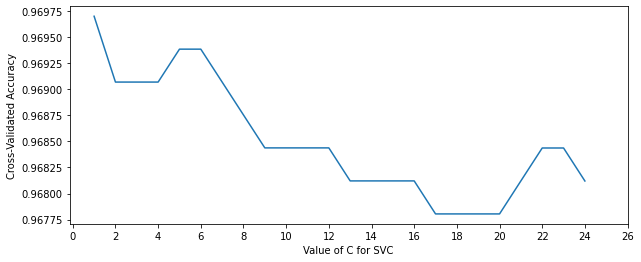

In [32]:
# ploting cross validation accuracy versus C values

import matplotlib.pyplot as plt
%matplotlib inline

C_values=list(range(1,25))
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.figure(figsize=(10,4))
plt.plot(C_values,acc_score)
plt.xticks(np.arange(0,27,2))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')

**Oservations**
- It appears that Cross validation accuracy score is higher for the C values of SVC between 1-6 where accuracy scores are greater than 96.9%.
- Accuracy drops when C value increases beyond 6.  

In [33]:
# Lets verify the exact value of 'C'

C_range=list(np.arange(0.1,6,0.1))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score) 

[0.9706474863235236, 0.9693846583875733, 0.9693836601046201, 0.9693836601046201, 0.9696991175178692, 0.9696991175178692, 0.9693836601046201, 0.9696981192349158, 0.9693826618216667, 0.9696991175178692, 0.9696991175178692, 0.9696991175178692, 0.9696991175178692, 0.9690672044084174, 0.9693836601046201, 0.9693836601046201, 0.9693836601046201, 0.9693836601046201, 0.969068202691371, 0.969068202691371, 0.9693836601046201, 0.9693836601046201, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.9693836601046201, 0.9693836601046201, 0.9693836601046201, 0.9693836601046201, 0.9693836601046201, 0.969

Text(0, 0.5, 'Cross-Validated Accuracy')

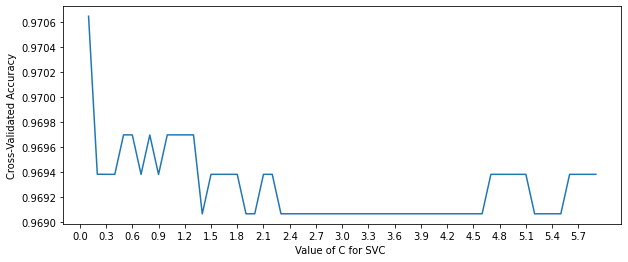

In [34]:
# ploting cross validation accuracy versus C values

import matplotlib.pyplot as plt
%matplotlib inline

C_values=list(np.arange(0.1,6,0.1))
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.figure(figsize=(10,4))
plt.plot(C_values,acc_score)
plt.xticks(np.arange(0.0,6,0.3))
plt.xlabel('Value of C for SVC ')
plt.ylabel('Cross-Validated Accuracy')

**Observation**
- Accuracy score is highest for **C=0.1**

### 10.9 Taking kernal as 'RBF' and explore different values of 'gamma'

In [35]:
gamma_range=[0.0001,0.001,0.01,0.1,1,10,100]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

[0.888240226809887, 0.9551820868106857, 0.9681168390368565, 0.9636874575729744, 0.9061883560276325, 0.6016421754582119, 0.49905362776025236]


Text(0, 0.5, 'Cross-Validated Accuracy')

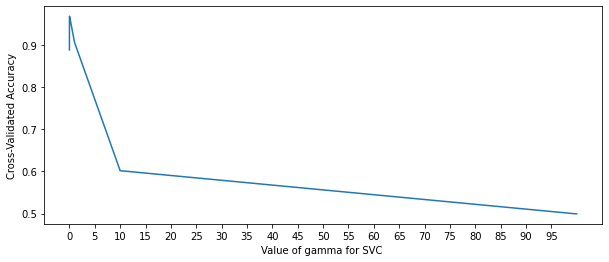

In [36]:
# ploting cross validation accuracy versus C values

gamma_range=[0.0001,0.001,0.01,0.1,1,10,100]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.figure(figsize=(10,4))
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.xticks(np.arange(0.0001,100,5))
plt.ylabel('Cross-Validated Accuracy')

**Observations**
- Cross validation score drops significantly when gamma values are set between 5-100
- There is a spike in cross validation accuracy score for gamma values between '0.0001 - 0.1'

In [37]:
# Lets verify the exact value of 'gamma'

gamma_range=[0.0001,0.001,0.01,0.1]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

[0.888240226809887, 0.9551820868106857, 0.9681168390368565, 0.9636874575729744]


Text(0, 0.5, 'Cross-Validated Accuracy')

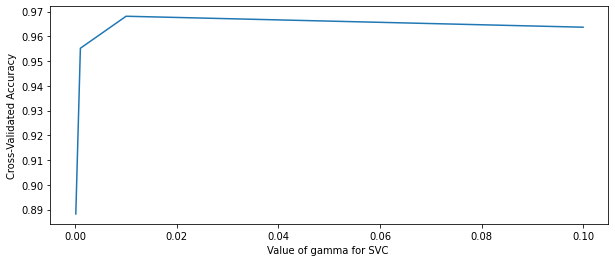

In [38]:
gamma_range=[0.0001,0.001,0.01,0.1]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.figure(figsize=(10,4))
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.ylabel('Cross-Validated Accuracy')

**Observations**
- it appears that cross validation accuracy is highest around gamma= 0.1 and <br>then it gradually decreases as gamma values changes to 1. let us verify this.

In [39]:
gamma_range=[0.01,0.02,0.03,0.04,0.05]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

[0.9681168390368565, 0.9681168390368565, 0.9681148424709501, 0.9671664736652957, 0.9665325639899376]


Text(0, 0.5, 'Cross-Validated Accuracy')

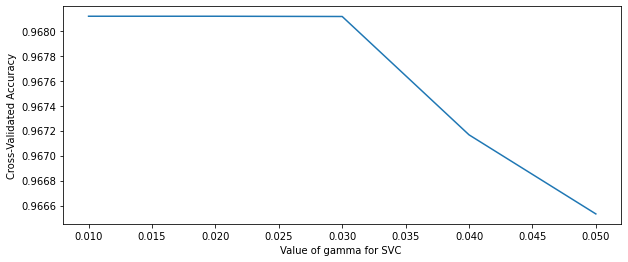

In [40]:
gamma_range=[0.01,0.02,0.03,0.04,0.05]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.figure(figsize=(10,4))
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.ylabel('Cross-Validated Accuracy')

**Observations**
- with kernel parameter as 'RBF'; the best gamma value for this dataset is 0.01

### 10.10 Taking polynomial kernel with different degree as a parameter

In [41]:
degree=[2,3,4,5,6]
acc_score=[]
for d in degree:
    svc = SVC(kernel='poly', degree=d)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score) 

[0.8515842750469194, 0.9450654873617378, 0.8313989937307829, 0.8661622010142555, 0.7736463283152977]


Text(0, 0.5, 'Cross-Validated Accuracy')

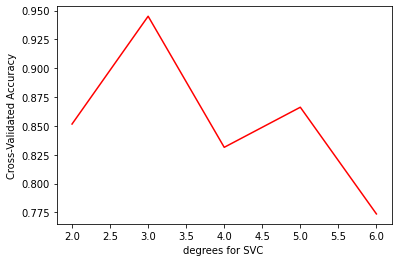

In [42]:
degree=[2,3,4,5,6]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(degree,acc_score,color='r')
plt.xlabel('degrees for SVC ')
plt.ylabel('Cross-Validated Accuracy')

**Observation**
- it appears that cross validation accuracy score for the polynomial kernel is highest<br> at degree = 3 and it drops as the value of degree increases more than 3.

### 10.11 Now performing SVM by taking hyperparameter C=0.1 and kernel as linear

In [43]:
#@title
from sklearn.svm import SVC
svc= SVC(kernel='linear',C=0.1)
svc.fit(X_train,y_train)
y_predict=svc.predict(X_test)
accuracy_score= metrics.accuracy_score(y_test,y_predict)
print(accuracy_score)

0.9768664563617245


### 10.12 With K-fold cross validation(where K=10)

In [44]:

svc=SVC(kernel='linear',C=0.1)
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())

[0.90851735 0.97160883 0.97476341 0.97791798 0.95899054 0.99053628
 0.99369085 0.97791798 0.95886076 0.99367089]
0.9706474863235236


### 10.13 Now performing SVM by taking hyperparameter gamma=0.01 and kernel as rbf

In [45]:
#@title
svc= SVC(kernel='rbf',gamma=0.01)
svc.fit(X_train,y_train)
y_predict=svc.predict(X_test)
metrics.accuracy_score(y_test,y_predict)

0.9768664563617245

### 10.14 With K-fold cross validation(where K=10)

In [46]:
svc=SVC(kernel='rbf',gamma=0.01)
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())

[0.92113565 0.94637224 0.97791798 0.97791798 0.95583596 0.99684543
 0.99369085 0.98107256 0.93670886 0.99367089]
0.9681168390368565


### 10.15 Now performing SVM by taking hyperparameter degree=3 and kernel as poly

In [47]:
#@title
svc= SVC(kernel='poly',degree=3)
svc.fit(X_train,y_train)
y_predict=svc.predict(X_test)
accuracy_score= metrics.accuracy_score(y_test,y_predict)
print(accuracy_score)

0.9589905362776026


### 10.16 With K-fold cross validation(where K=10)

In [48]:
svc=SVC(kernel='poly',degree=3)
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())

[0.89274448 0.94952681 0.93059937 0.92744479 0.94952681 0.99369085
 0.98422713 0.96529968 0.87974684 0.9778481 ]
0.9450654873617378


**Observations**
- Cross validation accuracy score is same for the model with kernels 'Linear' and 'RBF' with C=0.1 and gamma = 0.01 respectively. K-fold validation accuracy score is slightly better for linear kernel versus RBF kernel.

### 10.17 Let us perform Grid search technique to find the best parameter



In [49]:
#@title
from sklearn.svm import SVC
svm_model= SVC()

In [50]:
#@title
tuned_parameters = {
 'C': (np.arange(0.1,1,0.1)) , 'kernel': ['linear'],
 'C': (np.arange(0.1,1,0.1)) , 'kernel': ['rbf'], 'gamma': [0.01,0.02,0.03,0.04,0.05],
 'C': (np.arange(0.1,1,0.1)) , 'kernel': ['poly'], 'gamma': [0.01,0.02,0.03,0.04,0.05], 'degree': [2,3,4]  
                   }

In [51]:
#@title
from sklearn.model_selection import GridSearchCV
model_svm = GridSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy')

In [52]:
#@title
model_svm.fit(X_train, y_train)
print(model_svm.best_score_)

0.9535567241449595


In [53]:
#best parameters
print(model_svm.best_params_)

{'C': 0.9, 'degree': 3, 'gamma': 0.05, 'kernel': 'poly'}


In [54]:
y_pred= model_svm.predict(X_test)
print(metrics.accuracy_score(y_pred,y_test))

0.9589905362776026


### 10.18 Verify accuracy with Logistic Classifier, Decision Tree and Random Forest algorithms

- Logistic Classifier

In [55]:
from sklearn import linear_model, metrics
clf = linear_model.LogisticRegression(random_state=0).fit(X, y)

y_pred = clf.predict(X_test)
print("Logistic Regression model accuracy:", metrics.accuracy_score(y_test, y_pred))

Logistic Regression model accuracy: 0.9810725552050473


- K-fold cross validation of Logistic Regressor model

In [56]:
from sklearn.model_selection import cross_val_score 

cross_val_score(clf, X, y, cv=10, scoring='accuracy').mean()

0.9668570059497663

- Decision Tree

In [57]:
#Find the best parameter to prune the tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

def dt_error(n,X_train,y_train,X_test,y_test):
    nodes = range(2, n)
    error_rate = []
    for k in nodes:
        model = DecisionTreeClassifier(max_leaf_nodes=k)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        error_rate.append(np.mean(y_pred != y_test))
    kloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at n=%s." % (error_rate[kloc], nodes[kloc]))
    plt.plot(nodes, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.xlabel('Tree Size')
    plt.ylabel('Cross-Validated MSE')
    plt.show()
    return nodes[kloc]

Lowest error is 0.022082018927444796 occurs at n=8.


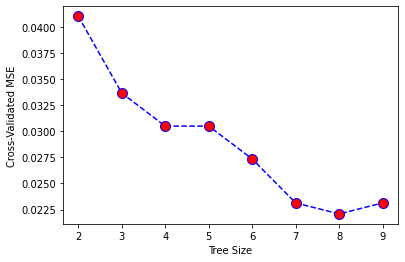

In [58]:
n=dt_error(10,X_train,y_train,X_test,y_test)

In [59]:
#prune tree
pruned_tree = DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes = n,random_state=1).fit(X,y)

y_pred = pruned_tree.predict(X_test)
print("Decision Tree model accuracy:",  
metrics.accuracy_score(y_test, y_pred))

Decision Tree model accuracy: 0.9831756046267087


- K-fold cross validation of Decision Tree model

In [60]:
from sklearn.model_selection import cross_val_score 

cross_val_score(pruned_tree, X, y, cv=10, scoring='accuracy').mean()

0.963695443836601

- Random Forest

In [61]:
# find the best parameter to tune Random forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

def rf_error(n,X_train,y_train,X_test,y_test):
    error_rate = []
    e=range(1,n,20)
    for i in e:
        model = RandomForestClassifier(n_estimators = i)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        error_rate.append(np.mean(y_pred != y_test))
    nloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at n=%s." % (error_rate[nloc], e[nloc]))

    plt.plot(e, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. n Value')
    plt.xlabel('n')
    plt.ylabel('Error Rate')
    plt.show()
    return e[nloc]

Lowest error is 0.015772870662460567 occurs at n=81.


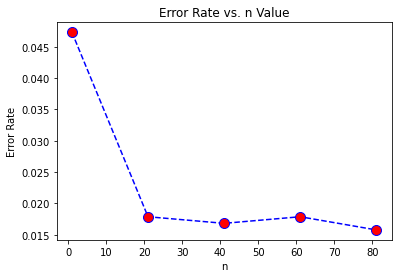

In [62]:
e=rf_error(100,X_train,y_train,X_test,y_test)

In [63]:
rf = RandomForestClassifier(n_estimators=e,random_state=2).fit(X, y)
y_pred = rf.predict(X_test)
print("Random Forest model accuracy:",  
metrics.accuracy_score(y_test, y_pred))

Random Forest model accuracy: 1.0


- K-fold cross validation of Random Forest model

In [64]:
from sklearn.model_selection import cross_val_score 
cross_val_score(rf, X, y, cv=10, scoring='accuracy').mean()

0.967797388491794

In [65]:
%%html
<style>
table {float:left}
</style>

---
<a name = Section11></a>
### **11 Conclusion**
---
- SVM at default state uses 'RBF' kernel as kernel parameter.
SVM with ‘RBF ' kernel gives higher accuracy where as the SVM with 'Polynomial' kernel gives lower accuracy.<br>

- When Accuracy score is compared for different kernels at their best hyper parameters; ‘RBF’ and ‘Linear’ kernels are computing highest accuracy score which is 0.9768.<br>

- Best SVM parameters with ‘Grid Search’ method are - {'C': 0.9, 'degree': 3, 'gamma': 0.05, 'kernel': 'poly'} with accuracy of ‘0.9589’.<br>

- Random forest algorithm model gives highest accuracy score followed by Decision Tree, Logistic Regressor and Support Vector Machine (lowest).<br>



**Kernel Identification:**


|SVM Defaults Kernals | Accuracy Scores |
|:--------------------|:----------------|
|SVM - Default        |**0.9831**       |
|SVM - Linear         |**0.9789**       |
|SVM - RBF            |**0.9831**       |
|SVM - Polynomial     |**0.9589**       |

**Accuracy Scores for different SVM Kernels with best parameters:**

|SVM Defaults Kernals | Accuracy Scores |Hyperparameters     |
|---------------------|-----------------|--------------------|
|SVM - Linear         |**0.9768**       |@ C=0.1             |
|SVM - RBF            |**0.9768**       |gamma = 0.01        |
|SVM - Polynomial     |**0.9589**       |Degree = 3          |

**Compare Accuracy scores of different Classification Models:**

|SVM Defaults Kernals | Accuracy Scores |Hyperparameters                     |
|---------------------|-----------------|------------------------------------|
|SVM - Polynomial     |**0.9589**       |@ C=0.9, gamma= 0.05, degree = 3    |
|Logstic Regressor    |**0.9810**       |                                    |
|Decision Tree        |**0.9821**       |max_leaf_nodes = 9, criterion="gini"|
|Random Forest        |**1.0**          |n_estimators = 41                   |



---
<a name = Section12></a>
### **12 Recommendation**
---
- Random Forest model gives better accuracy score over Support Vector Machine models as well as other classification models for the given dataset. Recommendation here is to use Random Forest model for predicting Gender of a person using voice samples as an input.